Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 3
## april 2021. 

Ana Zoric 0009/2020

<font color='red'>
Preimenovati svesku u "domaci_zadatak_3_ime_prezime"<br></font>

# __Zadatak__: SIRV model
SIRV model epidemije uključuje mogućnost kontinualne vakcinacije određenog broja podložnih jedinki $v = v(t)$ tokom epidemije. Sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane populacije se u tom slučaju izražava na sledeći način:

\begin{equation}
    \frac{dS}{dt} = -\alpha S I - v\\
    \frac{dI}{dt} = \alpha S I - \beta I\\
    \frac{dR}{dt} = \beta I + v
\end{equation}

gde je $S$ broj jedinki podložnih oboljevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije i $\beta$ konstanta brzine oporavka.  

Na početku epidemije jedna jedinka zaražena virusom influence (gripa) ulazi u izolovanu podložnu populaciju od $1000$ jedinki. Evolucija epidemije i proces kontinualne vakcinacije počinju u istom trenutku. Konstante brzine koje definišu širenje virusa su $\alpha = 0.002$, $\beta = 1$ i definišu se na nedeljnom (sedmičnom) nivou. 

Navedena populacija nalazi se unutar zemlje u razvoju koja nije u mogućnosti da finansira pun kapacitet kontinualne vakcinacije. Stoga povremeno dolazi do nestašice vakcina, pa se broj vakcinisanih podložnih jedinki menja u vremenu prema zavisnosti $v(t)$ prikazanoj na slici uz zadatak. Zavisnost $v(t)$ se sastoji od niza pozitivnih poluperioda harmonijske sinusne funkcije koja je opisana amplitudom $v = 50$ i frekvencijom $f = 0.25$/nedelja.

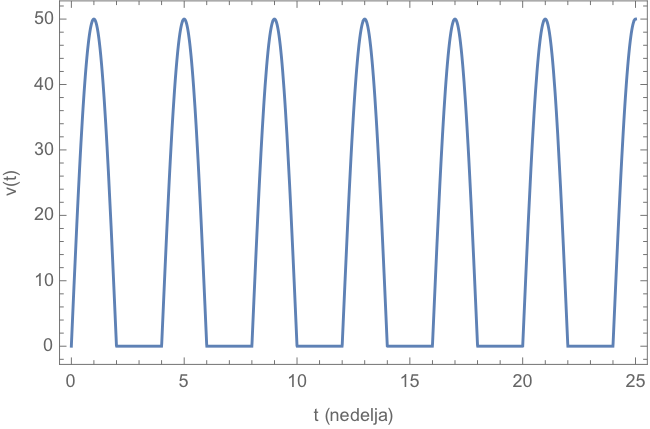

a)	Sastaviti matematički izraz (ili segment programskog koda u formi Python definicije) koji definiše i iscrtava zavisnost $v(t)$ na intervalu od $0$ do $25$ nedelja i reprodukovati sliku pridruženu uz zadatak.

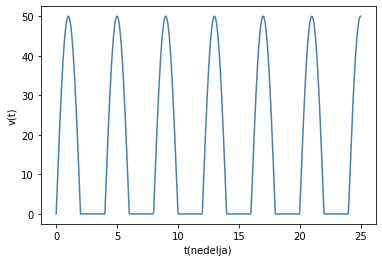

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
def grafik(v,t,f):
    w=2*f*t*math.pi
    rez=list()
    for i in w:
        x=math.sin(i)*v
        if x>=0: rez.append(x)
        else: rez.append(0)
    return rez

def fja(v,t,f):
    ret= v*math.sin(2*f*t*math.pi)
    if ret<0:ret=0
    return ret

t=np.linspace(0,25,1000)
v=50
f=0.25
y=grafik(v,t,f)
plt.plot(t,y,color="steelBlue")
plt.xlabel("t(nedelja)")
plt.ylabel("v(t)")
plt.show()

b)	Napisati Python definiciju koja opisuje sistem diferencijalnih jednačina SIRV modela u kome je dinamika vakcinacije definisana izrazom (ili Python definicijom) iz tačke a). Definiciji koja opisuje sistem diferencijalnih jednačina zadati $\alpha$, $\beta$ i $v$ kao kao argumente. 

In [2]:
def sirv(y,t,a,b,v):
    v=v*math.sin(2*f*t*math.pi)
    if v<0:v=0
    s,i,r=y
    ds=-a*s*i-v
    di=a*s*i-b*i
    dr=b*i+v
    return [ds,di,dr]


c)	Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $25$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$, $I(t)$ i $R(t)$ na istom grafiku. Krive zavisnosti obeležiti različitim tipovima linija, različitim bojama i odgovarajućom legendom. Tipove linija, kao i njihove boje birati po sopstvenom nahođenju. Obeležiti $x$ i $y$ ose grafika, i dodati naslov u kome je potrebno da budu napisane vrednosti parametara $\alpha$ i $\beta$.

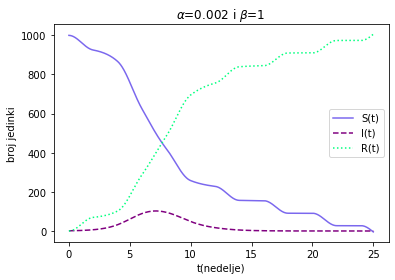

In [3]:
from scipy.integrate import odeint

a=0.002
b=1
y0=[1000,1,0]
rez=odeint(sirv,y0,t,(a,b,v))
rez=np.transpose(rez)
plt.plot(t,rez[0],color="mediumSlateBlue",linestyle="-",label="S(t)")
plt.plot(t,rez[1],color="purple",linestyle="--",label="I(t)")
plt.plot(t,rez[2],color="springGreen",linestyle="dotted",label="R(t)")
plt.xlabel("t(nedelje)")
plt.ylabel("broj jedinki")
plt.legend()
plt.title("$\\alpha$={} i $\\beta$={}".format(a,b))
plt.show()

d) Koliko nedelja je potrebno da epidemija dostigne svoj maksimum? Napraviti definiciju koja traži sve maksimume proizvoljnog niza, a zatim iz svih lokalnih maksimuma izdvojiti globalni maksimum i vremenski trenutak u kome se dostiže. 

In [4]:
def maksimumi(niz,t):
    rez=[[niz[i],t[i]] for i in range(1,len(niz)-1) if niz[i-1]<niz[i] and niz[i]>niz[i+1]]
    return rez

maks=maksimumi(rez[1],t)
mx=0
for i in maks:
    if i[0]>mx: mx=i[0]; tmx=i[1]
print("Maksimum zarazenih u toku epidemije je: {}  obolelih,\nTrenutak u kom se dostize maksimum je:  {}  nedelja.".format(mx,tmx))


Maksimum zarazenih u toku epidemije je: 102.40390230955494  obolelih,
Trenutak u kom se dostize maksimum je:  7.132132132132132  nedelja.


<font color='red'>Uneti komentar/odgovor na pitanje.</font>

Potrebno je 7.13 nedelja da epidemija dostigne svoj maksimum.

e) Koliko iznosi maksimalni broj zaraženih jedinki za date parametre? (Iskoristiti funkciju iz prethodnog pitanja). Komentarisati uticaj dinamike vakcinacije na trendove krivih $S(t)$, $I(t)$ i $R(t)$. 

<font color='red'>Uneti komentar/odgovor na pitanje.</font>

Maksimalan broj zarazenih jedinki za date parametre iznosi 102.
Zbog vakcinacije krive S(t) i R(t) nisu monotono opadajuce odnosno rastuce, vec se vidi promena u monotonosti kada kolicina vakcina raste ili opada, odnosno krive su "talasaste".

f) Odrediti u kom trenutku je bezbedno prestati sa vakcinacijom jedinki u podložnoj populaciji i obrazložiti odgovor.

<font color='red'>Uneti komentar/odgovor na pitanje.</font>

Nakon 15.nedelje, jer je tada broj jedinki koje vise nisu podlozne zarazi(R) preko 80%, a broj zarazenih postaje ravna linija.

g) Ponoviti tačku c), odnosno reprodukovati grafik iz tačke c) rešavanjem sistema jednačina pomoću FDM (metoda konačnih razlika) metode umesto ugrađenim metodama kao u tački c). Na istoj slici prikazati zavisnosti $S(t)$, $I(t)$ i $R(t)$ dobijene rešavanjem pomoću ugrađenih metoda, kao i iste te zavisnosti dobijene rešavanjem pomoću FDM metode. Linije dobijene preko ugrađenih metoda prikazati kao isprekidane linije proizvoljnih boja, a linije dobijene rešavanjem pomoću FDM metode prikazati kao pune linije istih proizvoljno izabranih boja. Uneti legendu oznaka, kao i obeležja osa. 

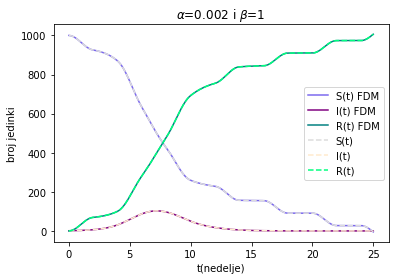

In [22]:
a=0.002
b=1
#y0=[1000,1,0]
#rez=odeint(sirv,y0,t,(a,b,v))
#rez=np.transpose(rez)
dt=25/1000
rez2=[[],[],[]]
rez2[0]=[0]*1000
rez2[1]=[0]*1000
rez2[2]=[0]*1000
rez2[0][0]=1000
rez2[1][0]=1
rez2[2][0]=0
v=50
for j in range(999):
    s,i,r=sirv([rez2[0][j],rez2[1][j],rez2[2][j]],t[j+1],a,b,v)
    rez2[0][j+1]=rez2[0][j]+dt*s
    rez2[1][j+1]=rez2[1][j]+dt*i
    rez2[2][j+1]=rez2[2][j]+dt*r
plt.plot(t,rez2[0],color="mediumSlateBlue",linestyle="-",label="S(t) FDM")
plt.plot(t,rez2[1],color="purple",linestyle="-",label="I(t) FDM")
plt.plot(t,rez2[2],color="teal",linestyle="-",label="R(t) FDM")

plt.plot(t,rez[0],color="gainsboro",linestyle="--",label="S(t)")
plt.plot(t,rez[1],color="blanchedAlmond",linestyle="--",label="I(t)")
plt.plot(t,rez[2],color="springGreen",linestyle="--",label="R(t)")

plt.xlabel("t(nedelje)")
plt.ylabel("broj jedinki")
plt.legend()
plt.title("$\\alpha$={} i $\\beta$={}".format(a,b))
plt.show()